In [1]:
# %pip install calmap

In [23]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=30, freq='D')

events = pd.Series(np.random.randn(len(all_days)), index=all_days)
print(events)

# pd.Series?

2014-01-15    0.844151
2014-01-16    0.365116
2014-01-17   -0.632075
2014-01-18   -0.873354
2014-01-19   -1.626578
2014-01-20    3.420576
2014-01-21   -0.514312
2014-01-22   -0.396960
2014-01-23   -0.268367
2014-01-24   -1.252624
2014-01-25    1.676244
2014-01-26    0.310242
2014-01-27   -0.306250
2014-01-28   -0.205342
2014-01-29   -0.981837
2014-01-30    0.112850
2014-01-31    1.912057
2014-02-01   -1.178270
2014-02-02    1.062010
2014-02-03   -1.115350
2014-02-04    1.080255
2014-02-05    0.494375
2014-02-06   -1.102348
2014-02-07   -1.271545
2014-02-08    0.859747
2014-02-09    0.304209
2014-02-10   -0.175360
2014-02-11   -0.581329
2014-02-12   -0.357697
2014-02-13   -0.625215
Freq: D, dtype: float64


In [12]:
help(calmap)


Help on package calmap:

NAME
    calmap - Calendar heatmaps from Pandas time series data.

DESCRIPTION
    Plot Pandas time series data sampled by day in a heatmap per calendar year,
    similar to GitHub's contributions calendar.

PACKAGE CONTENTS


FUNCTIONS
    calendarplot(data, how='sum', yearlabels=True, yearascending=True, yearlabel_kws=None, subplot_kws=None, gridspec_kws=None, fig_kws=None, **kwargs)
        Plot a timeseries as a calendar heatmap.
        
        Parameters
        ----------
        data : Series
            Data for the plot. Must be indexed by a DatetimeIndex.
        how : string
            Method for resampling data by day. If `None`, assume data is already
            sampled by day and don't resample. Otherwise, this is passed to Pandas
            `Series.resample`.
        yearlabels : bool
           Whether or not to draw the year for each subplot.
        yearascending : bool
           Sort the calendar in ascending or descending order.
      

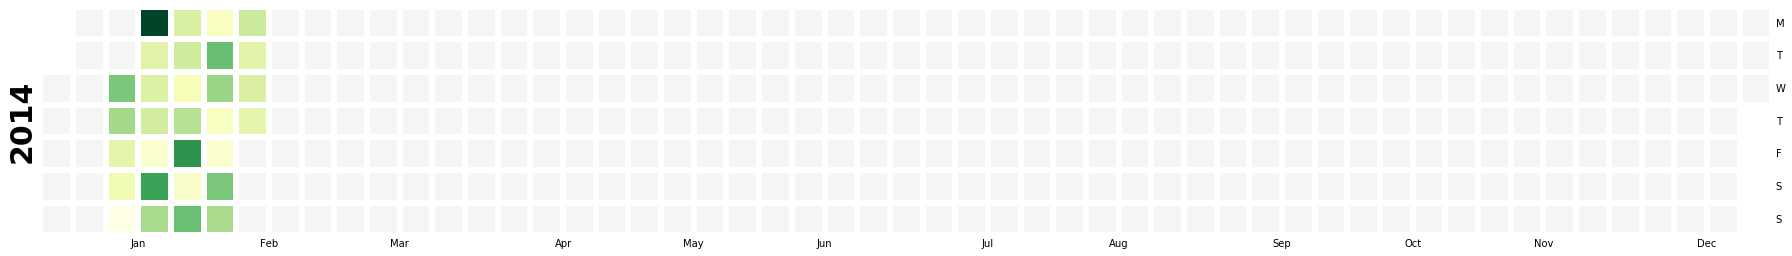

In [130]:
calmap.calendarplot(events, daylabels='MTWTFSS', linewidth=5, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':30}, fig_kws=dict(figsize=(25, 10)))

calmap.plt.savefig("./calendar.png")

In [4]:
import time
import pymongo
import os

#DATABASE CONFIGURATION
DATABASE_NAME = "bot_db"

#engine and connection
connection = pymongo.MongoClient("mongodb://localhost:27017/")
bot_db = connection[DATABASE_NAME] #creating DB

#creation of collections
users_collection = bot_db["users_collection"]
users_activities_collection = bot_db["users_activities_collection"]

user_id = 336091411
category_name = "органика"

def get_time_data_for_category (user_id, category_name):
    myquery = {"categories.category_name": category_name}
    mydoc = users_activities_collection.find(myquery)
    return mydoc

mydoc = get_time_data_for_category (user_id, category_name)

for element in mydoc:
    dicts = element["categories"]
    category_data = next((item for item in dicts if item["category_name"] == category_name), None)
    category_time_data = category_data ["timer_data"]
    print (category_time_data)
    
    all_days = []
    total_time_per_day_list =[]
    one_day_data_list = []
    counter = 0
    for record in category_time_data:
        try: 
            if all_days[counter-1] == record["date"].split()[0]:
                total_time_per_day_list[counter-1] = total_time_per_day_list[counter-1] + record["amount_of_time_in_minutes"]
            elif all_days[counter] != record["date"].split()[0]:
                total_time_per_day_list[counter] = record["amount_of_time_in_minutes"]
        
        one_day_data_list = filter(lambda i: category_time_data[i]["date"].split()[0] == record["date"].split()[0], range(len(category_time_data)))
        for item in one_day_data_list:
            print (item)
#         print(one_day_data_list)
        
        counter += 1
#         all_days.append(record["date"].split()[0])
#     print (all_days)


SyntaxError: invalid syntax (<ipython-input-4-b8b75542e622>, line 43)

2020-05-30      0.0
2020-05-31      0.0
2020-06-01      0.0
2020-06-02      0.0
2020-06-03      0.0
2020-06-04      0.0
2020-06-05      0.0
2020-06-06      0.0
2020-06-07      0.0
2020-06-08      0.0
2020-06-09      0.0
2020-06-10      0.0
2020-06-11      0.0
2020-06-12      0.0
2020-06-13      0.0
2020-06-14      0.0
2020-06-15      0.0
2020-06-16      0.0
2020-06-17      0.0
2020-06-18      0.0
2020-06-19      0.0
2020-06-20      0.0
2020-06-21      0.0
2020-06-22      0.0
2020-06-23      0.0
2020-06-24      0.0
2020-06-25      0.0
2020-06-26      0.0
2020-06-27      0.0
2020-06-28      0.0
2020-06-29      0.0
2020-06-30    445.5
2020-07-01    685.6
2020-07-02    140.6
2020-07-03      0.0
2020-07-04      0.0
2020-07-05      0.0
2020-07-06      0.0
2020-07-07      0.0
2020-07-08      0.0
2020-07-09      0.0
2020-07-10      0.0
2020-07-11      0.0
2020-07-12      0.0
2020-07-13      0.0
2020-07-14      0.0
2020-07-15      0.0
2020-07-16      0.0
2020-07-17      0.0
2020-07-18      0.0


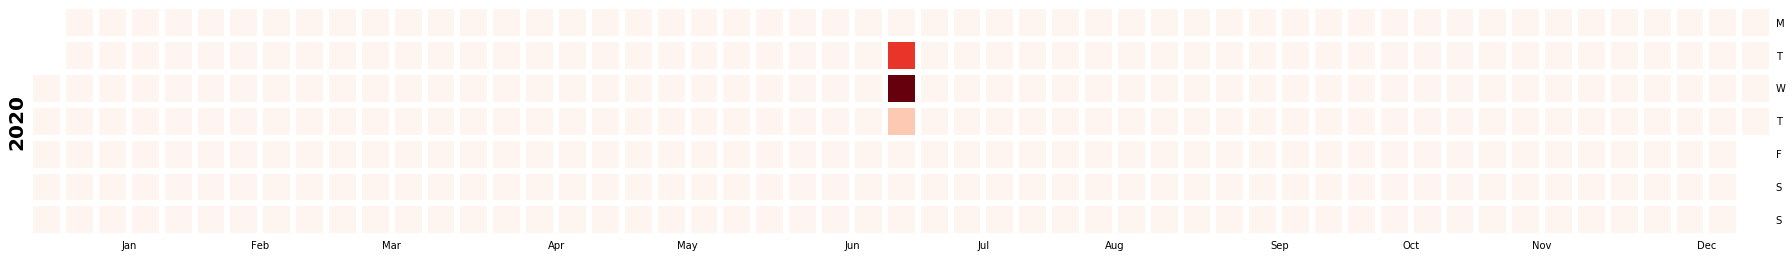

In [127]:
import time
import datetime
import pymongo
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import calmap
sys.path.append('..')
import modules.dbmodel as dbmodel
import modules.dbconfig as dbconfig
import modules.functions as functions
import modules.timer as timer

user_id = 336091411
category = "sleep"

def draw_year_geatmap(user_id, category):    
    
    date = str(datetime.date.today().replace(day=2))
    
    past_thirty_days = pd.date_range(end=datetime.date.today(), periods=30, freq='D')
    current_month = datetime.date.today().month
    current_month_days = pd.date_range(start=datetime.date.today().replace(day=1), periods=30, freq='D')
    current_year_days = pd.date_range(start=datetime.date.today().replace(day=1, month=1), end=datetime.date.today().replace(day=31, month=12), freq='D')

    date_list = list(current_year_days)
    for i in range(len(date_list)):
        date_list[i] = date_list[i].to_pydatetime().strftime("%Y-%m-%d")

    total_time_per_category_per_day_list =[]
    for date in date_list:
        total_time = dbmodel.total_time_per_category_by_date(user_id, category, date)['total_time']
        total_time_per_category_per_day_list.append(total_time)

    time_series = np.array(total_time_per_category_per_day_list)
    data = pd.Series(time_series, index=current_year_days)

    calmap.calendarplot(data, daylabels='MTWTFSS', linewidth=5, yearlabel_kws={'color':'black', 'fontsize':20}, fig_kws=dict(figsize=(25, 4)))
    
    print(data[150:200])
    calmap.plt.savefig("./calendar.png")
    
draw_year_geatmap(user_id, category)